In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

df = pd.read_csv('house_price_multifeature_150.csv')
   
print(df.head())
print(df.columns)
print(df.isna().sum())

   size_m2  bedrooms    price_k
0      173         2  33.785507
1       64         4  49.000229
2      113         4  50.946064
3       74         2  25.351405
4       73         3  39.505741
Index(['size_m2', 'bedrooms', 'price_k'], dtype='object')
size_m2     0
bedrooms    0
price_k     0
dtype: int64


In [85]:
df.dtypes

size_m2       int64
bedrooms      int64
price_k     float64
dtype: object

Distributions

<Axes: xlabel='size_m2', ylabel='price_k'>

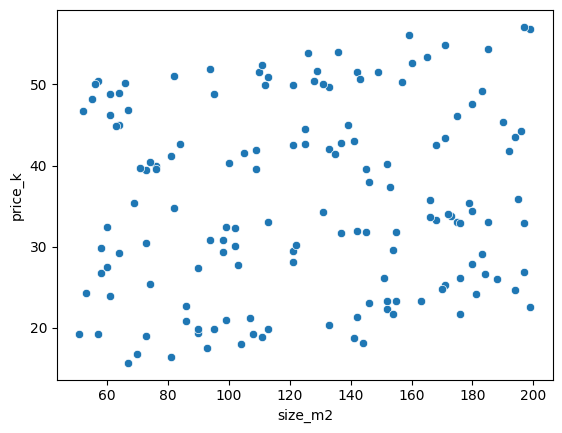

In [86]:
x = df[['size_m2','bedrooms']]
y = df['price_k']

sns.scatterplot(x='size_m2', y='price_k', data=df)


<Axes: xlabel='bedrooms', ylabel='price_k'>

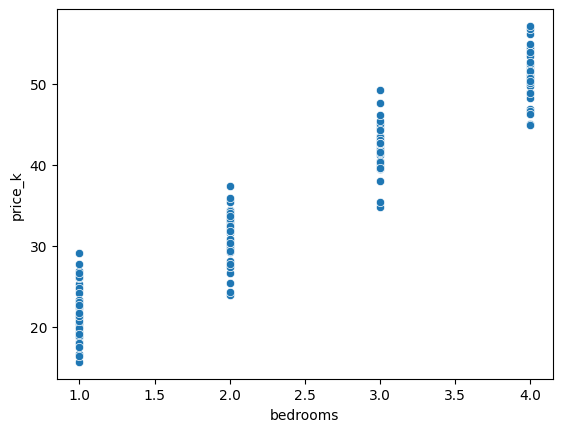

In [87]:

sns.scatterplot(x='bedrooms',y='price_k', data=df)


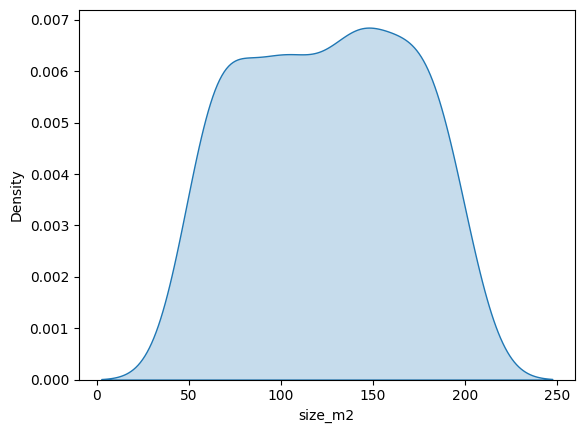

In [88]:
sns.kdeplot(df['size_m2'], fill=True)
plt.show()


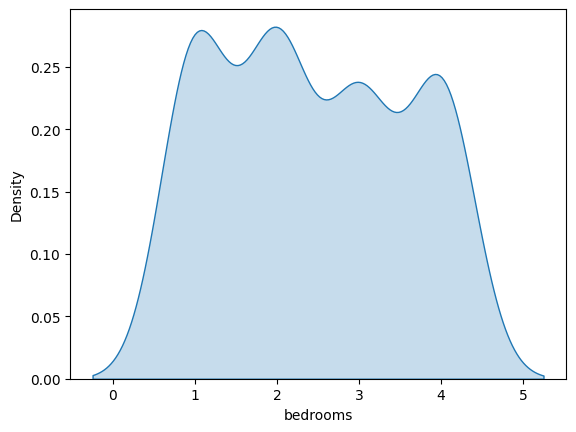

In [89]:
sns.kdeplot(df['bedrooms'], fill=True)
plt.show()

bedrooms
1    41
2    40
4    36
3    33
Name: count, dtype: int64


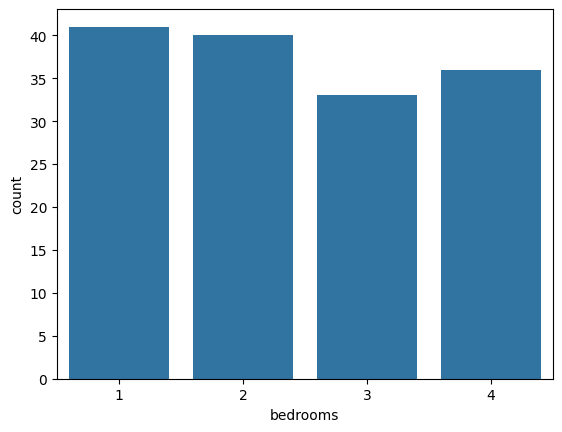

In [90]:
sns.countplot(x='bedrooms', data=df)
print(df['bedrooms'].value_counts())
plt.show()


          size_m2   price_k
size_m2  1.000000  0.084991
price_k  0.084991  1.000000


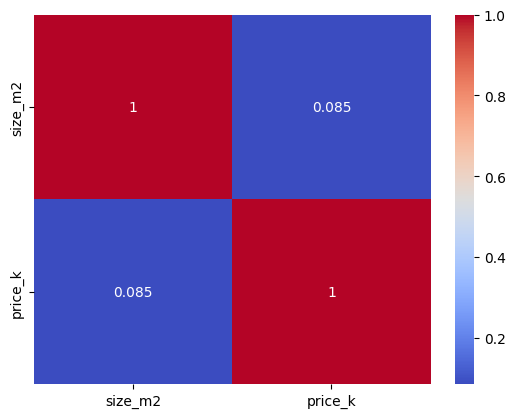

In [91]:
corr = df[['size_m2', 'price_k']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
print(corr)
plt.show()

          bedrooms   price_k
bedrooms  1.000000  0.962585
price_k   0.962585  1.000000


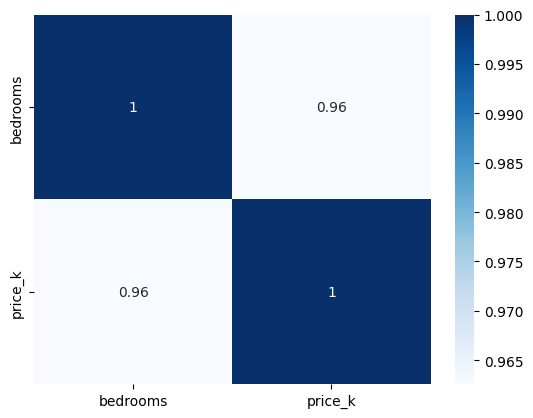

In [92]:
corr_b = df[['bedrooms','price_k']].corr()
sns.heatmap(corr_b,annot=True,cmap='Blues')
print(corr_b)
plt.show()

In [93]:
df['price_per_m2'] = df['price_k'] / df['size_m2']
df.head()

,size_m2,bedrooms,price_k,price_per_m2
0,173,2,33.785507,0.195292
1,64,4,49.000229,0.765629
2,113,4,50.946064,0.450850
3,74,2,25.351405,0.342587
4,73,3,39.505741,0.541175


ML

In [99]:
x = df[['size_m2','bedrooms']]
y = df['price_k']

X_train,X_test,y_train,y_test = train_test_split(x,y , test_size= 0.2 ,random_state=42)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(model.coef_[0])
print(model.intercept_)


2.442344836894122
35.19123405900914


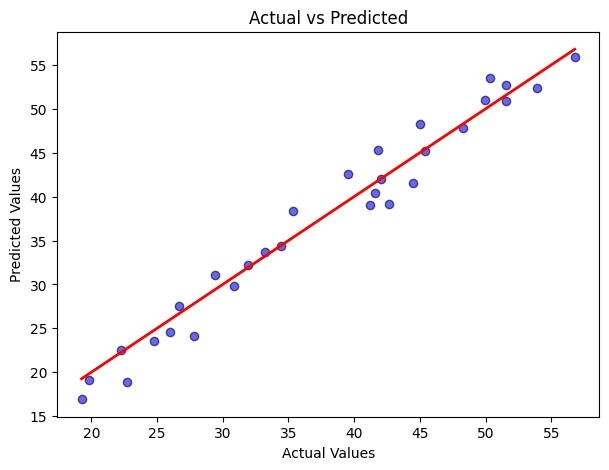

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, color="blue", alpha=0.6, edgecolors="k")


plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color="red", linestyle="-", linewidth=2)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()


In [96]:

print("mean_squared_error : ", mean_squared_error(y_test, y_pred))
print("mean_absolute_error : ", mean_absolute_error(y_test, y_pred))
print("r2_score : ", r2_score(y_test, y_pred))


mean_squared_error :  4.23403763897298
mean_absolute_error :  1.656624710352112
r2_score :  0.9638387802678279


In [ ]:
print(len(y_test), len(y_pred))

30 30


In [100]:
import pickle

In [ ]:
filename = 'trained_model.sav'
#pickle.dump(model,open(filename,'wb'))

In [102]:
loaded_model = pickle.load(open('trained_model.sav','rb'))

In [103]:
with open('trained_model.sav', 'wb') as f:
    pickle.dump((model, scaler), f)